In [1]:
from utils import *
from model_prophet import *

/Users/julius/repos/AFC/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
data = Data()
model = ProphetModel(data.merged_data)

In [3]:
# model.generate_forecasts()

11:35:22 - cmdstanpy - INFO - Chain [1] start processing
11:35:22 - cmdstanpy - INFO - Chain [1] done processing
11:35:22 - cmdstanpy - INFO - Chain [1] start processing
11:35:22 - cmdstanpy - INFO - Chain [1] done processing
11:35:23 - cmdstanpy - INFO - Chain [1] start processing
11:35:23 - cmdstanpy - INFO - Chain [1] done processing
11:35:23 - cmdstanpy - INFO - Chain [1] start processing
11:35:23 - cmdstanpy - INFO - Chain [1] done processing
11:35:24 - cmdstanpy - INFO - Chain [1] start processing
11:35:24 - cmdstanpy - INFO - Chain [1] done processing
11:35:24 - cmdstanpy - INFO - Chain [1] start processing
11:35:24 - cmdstanpy - INFO - Chain [1] done processing
11:35:25 - cmdstanpy - INFO - Chain [1] start processing
11:35:25 - cmdstanpy - INFO - Chain [1] done processing
11:35:25 - cmdstanpy - INFO - Chain [1] start processing
11:35:25 - cmdstanpy - INFO - Chain [1] done processing
11:35:26 - cmdstanpy - INFO - Chain [1] start processing
11:35:26 - cmdstanpy - INFO - Chain [1]

In [4]:
model.save_forecasts_to_csv('submission_prophet_model.csv')
model.df_all_forecasts

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,FOODS_3_001_TX_3_validation,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0
1,FOODS_3_002_TX_3_validation,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,FOODS_3_003_TX_3_validation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0
3,FOODS_3_004_TX_3_validation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,FOODS_3_005_TX_3_validation,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,FOODS_3_823_TX_3_validation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
819,FOODS_3_824_TX_3_validation,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
820,FOODS_3_825_TX_3_validation,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
821,FOODS_3_826_TX_3_validation,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [6]:
rmse = model.calculate_rmse(data.sales_test)
print(f'RMSE: {rmse}')

RMSE: 3.3184168359058615


In [7]:
#TODO: also factor the below code so this notebooks stays clean.

In [8]:
# In this cell, we will use a Prophet model on aggregated sales.
# We use weekly and yearly seasonality and include our events/holidays.

# Prepare the dataframe for Prophet
prophet_df = pd.DataFrame({'ds': data.daily_sales.index, 'y': data.daily_sales.values})
prophet_df['floor'] = 0

# Instantiate Prophet model with yearly and weekly seasonality
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)

# Fit the model
model.fit(prophet_df)

# Create a dataframe for future dates (next 28 days)
future = model.make_future_dataframe(periods=28)

# Generate forecasts
forecast = model.predict(future)

# Round to nearest int
forecast['yhat'] = forecast['yhat'].round()

11:47:11 - cmdstanpy - INFO - Chain [1] start processing
11:47:11 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
import pickle as pkl
from datetime import datetime
# Get the current time in a formatted string
current_time = datetime.now().strftime("%Y%m%d%H%M%S")

# Create a pickle file with the current time suffix
filename = f"prophet_{current_time}"
# export prohhet forecast to pickle
with open(f'forecast_pickles/{filename}.pkl', 'wb') as f:
    pkl.dump(forecast, f)

In [9]:
sales_test_long = pd.melt(data.sales_test, id_vars=['id'],
                           var_name='day', value_name='sales')
sales_test_long['day'] = pd.to_datetime('2011-01-29') + pd.to_timedelta(sales_test_long['day'].str[2:].astype(int) - 1, unit='D')
data.calendar['date'] = pd.to_datetime(data.calendar['date'])

merged_test_data = pd.merge(sales_test_long, data.calendar, left_on='day', right_on='date', how='left')

daily_sales_test = merged_test_data.groupby('day')['sales'].sum()

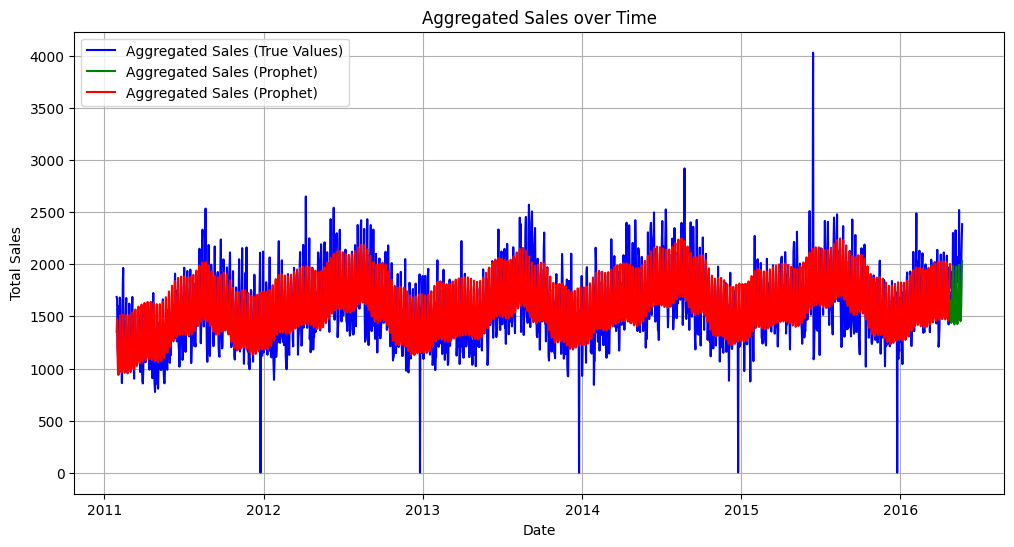

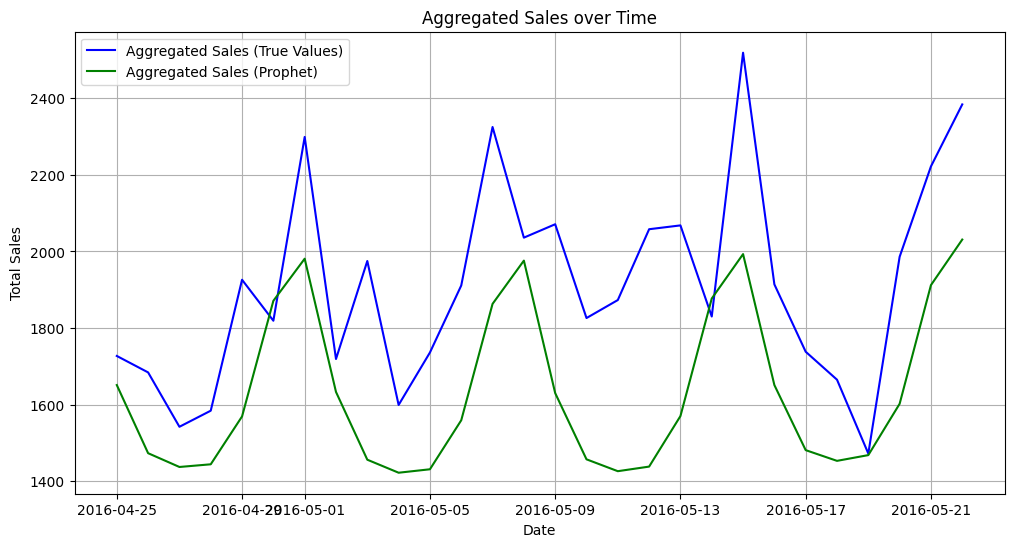

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(data.daily_sales.index, data.daily_sales.values, color='blue')
plt.plot(daily_sales_test.index, daily_sales_test.values, label='Aggregated Sales (True Values)', color='blue')
plt.plot(daily_sales_test.index, forecast['yhat'][1913:], label='Aggregated Sales (Prophet)', color='green')
plt.plot(data.daily_sales.index, forecast['yhat'][:1913], label='Aggregated Sales (Prophet)', color='red')
plt.title('Aggregated Sales over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales_test.index, daily_sales_test.values, label='Aggregated Sales (True Values)', color='blue')
plt.plot(daily_sales_test.index, forecast['yhat'][1913:], label='Aggregated Sales (Prophet)', color='green')
plt.title('Aggregated Sales over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend()
plt.show()